# Markup Viewer

In this notebook we will define procedure which displays bounding boxes for a given item.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from os.path import join

In [26]:
from matplotlib.patches import Rectangle

Load train data from parquet files.

In [3]:
DATADIR = '../../data/round/21'

In [21]:
user = pd.read_parquet(join(DATADIR, 'train_data.parquet')).set_index('item_id')
true = pd.read_parquet(join(DATADIR, 'train_ans.parquet')).set_index('item_id')

Define displying procedure.

In [ ]:
def display(item_id):
    COLORMAP = plt.cm.Paired.colors
    COLOURS = {}

    fig = plt.figure(figsize=(8, 8))
    ax: plt.Axes  = fig.add_subplot(1, 1, 1)
    ax.grid(False)

    # Display ground truth rectangle.
    row = true.loc[item_id]
    origin = (row.x_min, row.y_min)
    width = row.x_max - row.x_min
    height = row.y_max - row.y_min

    ax.add_patch(Rectangle(origin, width, height,
        fill=False,
        edgecolor='k',
        linewidth=2,
        label='true',
    ))

    # Display rectangles in dataset.
    for i, row in enumerate(user.loc[item_id].itertuples()):
        uid = row.user_id

        if uid not in COLOURS:
            COLOURS[uid] = COLORMAP[len(COLOURS)]
            label = f'user {uid}'
        else:
            label = None

        origin = (row.x_min, row.y_min)
        width = row.x_max - row.x_min
        height = row.y_max - row.y_min

        ax.add_patch(Rectangle(origin, width, height,
             edgecolor=COLOURS[uid],
             fill=False,
             label=label,
             linewidth=2,
        ))

    ax.legend()
    ax.set_xlim(0, 1500)
    ax.set_ylim(0, 1500)
    plt.show()

List of known item identifiers.

In [36]:
print(true.index.values)

[    5    10    13    30    32    48    64    78    90   118   137   142
   161   168   190   229   260   285   286   441   486   511   572   576
   577   622   667   678   794   801   813   843   910   998  1024  1032
  1067  1095  1125  1147  1275  1412  1451  1467  1473  1490  1518  1571
  1587  1614  1661  1690  1691  1751  1811  1817  1983  2001  2014  2053
  2059  2247  2373  2509  2613  2636  2647  2665  2685  2721  2722  2746
  2757  2765  2776  2780  2786  2891  2901  2969  3009  3019  3038  3118
  3135  3143  3146  3185  3281  3382  3412  3414  3420  3433  3452  3589
  3775  3777  3811  3816  3927  3973  4032  4038  4048  4052  4094  4104
  4117  4145  4163  4220  4236  4257  4322  4408  4538  4547  4549  4557
  4570  4582  4584  4608  4629  4631  4752  4788  4846  4878  4927  4936
  4972  4992  5009  5014  5067  5169  5205  5286  5312  5389  5444  5447
  5466  5471  5519  5602  5604  5611  5647  5670  5676  5705  5709  5778
  5797  5886  5907  5920  6013  6090  6132  6162  6

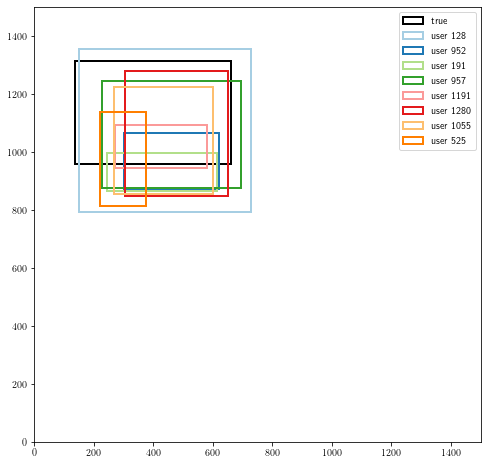

In [54]:
display(33598)